# Youtube Watch History

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('font', family = 'Arial')
font_path = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'

from datetime import datetime

## Import File

In [2]:
df = pd.read_json('watch-history.json')
df.head()

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,Watched How to Use Google Takeout in 2023,https://www.youtube.com/watch?v=lCJaAePnQb0,"[{'name': 'Richard Byrne', 'url': 'https://www...",2023-08-13T04:00:08.232Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched Andelyn_Bioscience_15sec - JP CAP,https://www.youtube.com/watch?v=DBECAfirnWY,NaN,2023-08-13T04:00:02.215Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 1:00 PM,[{'name': 'From Google Ads'}]
2,YouTube,Watched Python Project to Scrape YouTube using...,https://www.youtube.com/watch?v=SwSbnmqk3zY,"[{'name': 'techTFQ', 'url': 'https://www.youtu...",2023-08-13T03:44:17.649Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched NIKE INFINITY RN 4,https://www.youtube.com/watch?v=QTwVvs7sOj8,NaN,2023-08-13T03:44:09.944Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 12:44 PM,[{'name': 'From Google Ads'}]
4,YouTube,Watched Touch ID - Mac / JP / 16:9 / YouTube P...,https://www.youtube.com/watch?v=r0QPrIl0EP8,NaN,2023-08-13T03:43:55.076Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 12:43 PM,[{'name': 'From Google Ads'}]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32329 entries, 0 to 32328
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            32329 non-null  object
 1   title             32329 non-null  object
 2   titleUrl          31485 non-null  object
 3   subtitles         25560 non-null  object
 4   time              32329 non-null  object
 5   products          32329 non-null  object
 6   activityControls  32329 non-null  object
 7   description       3019 non-null   object
 8   details           3159 non-null   object
dtypes: object(9)
memory usage: 2.2+ MB


## Check null values

In [4]:
df.isnull().sum()

header                  0
title                   0
titleUrl              844
subtitles            6769
time                    0
products                0
activityControls        0
description         29310
details             29170
dtype: int64

In [5]:
# Identifying which rows have null values in any of the columns
df[df.isnull().any(axis=1)]

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,Watched How to Use Google Takeout in 2023,https://www.youtube.com/watch?v=lCJaAePnQb0,"[{'name': 'Richard Byrne', 'url': 'https://www...",2023-08-13T04:00:08.232Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched Andelyn_Bioscience_15sec - JP CAP,https://www.youtube.com/watch?v=DBECAfirnWY,NaN,2023-08-13T04:00:02.215Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 1:00 PM,[{'name': 'From Google Ads'}]
2,YouTube,Watched Python Project to Scrape YouTube using...,https://www.youtube.com/watch?v=SwSbnmqk3zY,"[{'name': 'techTFQ', 'url': 'https://www.youtu...",2023-08-13T03:44:17.649Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched NIKE INFINITY RN 4,https://www.youtube.com/watch?v=QTwVvs7sOj8,NaN,2023-08-13T03:44:09.944Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 12:44 PM,[{'name': 'From Google Ads'}]
4,YouTube,Watched Touch ID - Mac / JP / 16:9 / YouTube P...,https://www.youtube.com/watch?v=r0QPrIl0EP8,NaN,2023-08-13T03:43:55.076Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 12:43 PM,[{'name': 'From Google Ads'}]
...,...,...,...,...,...,...,...,...,...
32324,YouTube,Watched One Direction - Drag Me Down (Official...,https://www.youtube.com/watch?v=Jwgf3wmiA04,"[{'name': 'OneDirectionVEVO', 'url': 'https://...",2015-09-01T04:27:03.414Z,[YouTube],[YouTube watch history],NaN,NaN
32325,YouTube,Watched https://www.youtube.com/watch?v=-M59P-...,https://www.youtube.com/watch?v=-M59P-8kbBg,NaN,2015-08-19T05:37:50.894Z,[YouTube],[YouTube watch history],NaN,NaN
32326,YouTube,Watched APMAs 2015: All Time Low open with a m...,https://www.youtube.com/watch?v=GJhM-avL8j4,"[{'name': 'Alternative Press', 'url': 'https:/...",2015-08-19T05:23:25.333Z,[YouTube],[YouTube watch history],NaN,NaN
32327,YouTube,Watched The Weeknd - Can't Feel My Face (Offic...,https://www.youtube.com/watch?v=KEI4qSrkPAs,"[{'name': 'TheWeekndVEVO', 'url': 'https://www...",2015-08-19T05:17:58.610Z,[YouTube],[YouTube watch history],NaN,NaN


## We are removing the data from the years 2015 and 2016 to help make analysis easier

In [6]:
# Data type of time column is string
df['time'][0]

# Change time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Creating a sample data creation to view removing videos with year 2015 and 2016 in the 'time' column 
filtered_df = df[(df['time'].dt.year != 2015) & (df['time'].dt.year != 2016)]

filtered_df['time'].tail(10)

31667   2017-01-01 08:01:14.480000+00:00
31668   2017-01-01 07:48:31.101000+00:00
31669   2017-01-01 07:45:22.619000+00:00
31670   2017-01-01 07:40:53.342000+00:00
31671   2017-01-01 07:36:59.202000+00:00
31672   2017-01-01 07:31:22.335000+00:00
31673   2017-01-01 07:29:29.830000+00:00
31674   2017-01-01 01:33:26.377000+00:00
31675   2017-01-01 01:30:43.132000+00:00
31676   2017-01-01 01:14:59.420000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [7]:
# Update the original DataFrame with the updated removal of 2015 and 2016
df.drop(df[(df['time'].dt.year == 2015) | (df['time'].dt.year == 2016)].index, inplace=True)

df['time'].tail(10)

31667   2017-01-01 08:01:14.480000+00:00
31668   2017-01-01 07:48:31.101000+00:00
31669   2017-01-01 07:45:22.619000+00:00
31670   2017-01-01 07:40:53.342000+00:00
31671   2017-01-01 07:36:59.202000+00:00
31672   2017-01-01 07:31:22.335000+00:00
31673   2017-01-01 07:29:29.830000+00:00
31674   2017-01-01 01:33:26.377000+00:00
31675   2017-01-01 01:30:43.132000+00:00
31676   2017-01-01 01:14:59.420000+00:00
Name: time, dtype: datetime64[ns, UTC]

## Analyzing Title of Videos

In [8]:
# Notice that in 'Title' column, the word 'watched' is repeating
# There is no need for this as we know that we are viewing watch history 
# Deleting 'watched' from all rows in 'title' column
df['title'] = df['title'].apply(lambda x: x.split(' ', maxsplit = 1)[1])
df['title'].tail(10)

31667                            2017 bullet journal setup
31668                        a video that has been removed
31669                           plan with me: january 2017
31670                            how to start the new year
31671                      what to do with empty notebooks
31672                 Voldemort Hugs Draco HD Extended Cut
31673            Why You Should Be Proud To Be A Slytherin
31674          https://www.youtube.com/watch?v=CqPmfL1OLiE
31675                          My 3 Year Virus (explained)
31676    10 Harry Potter Facts That Weren't Revealed in...
Name: title, dtype: object

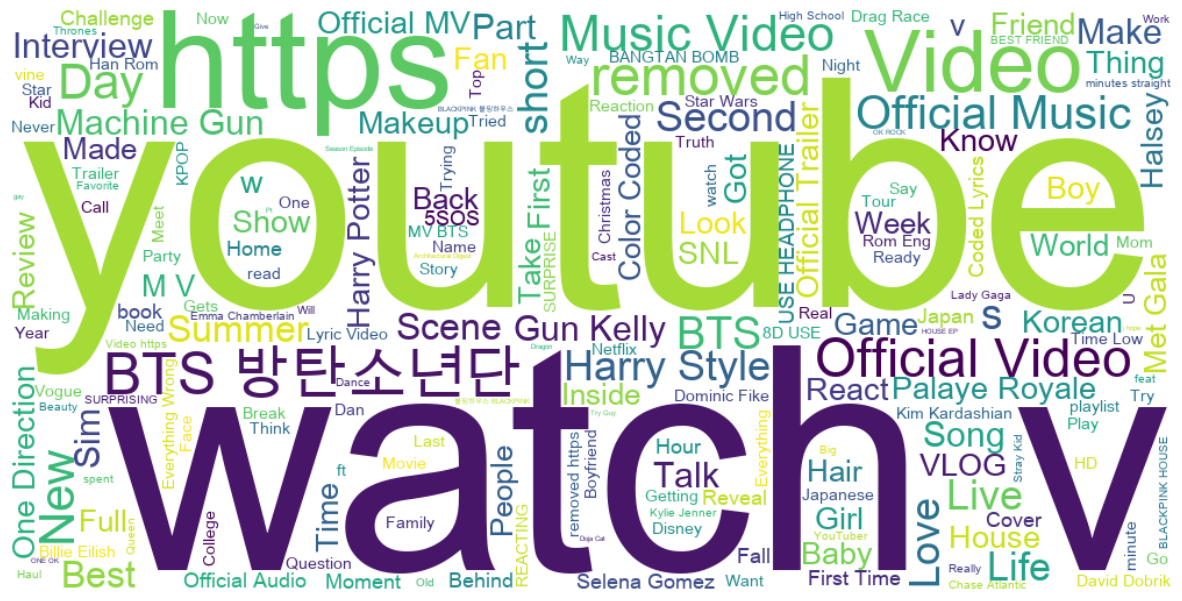

In [9]:
# Step 1: Combine rows into a single string 
combined_text = ' '.join(df['title'])

# Step 2: Generate the word cloud
wordcloud = WordCloud(width = 1000
                      , height = 500
                      , background_color = 'white'
                      , font_path = font_path
                      ).generate(combined_text)

# Step 3: Display the word cloud
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud
           , interpolation = 'bilinear'
          )
plt.axis('off')
plt.show()

### Investigate what the titles of the biggest words on the word cloud

In [10]:
# titles that contain 'watch'
# 3381 titles have 'watch' contained, mostly deleted videos 
watch_result = df[df['title'].str.contains('watch', case = False)]
print(watch_result)

        header                                              title  \
132    YouTube                   https://www.youtube.com/watch?v=   
217    YouTube                   https://www.youtube.com/watch?v=   
289    YouTube        https://www.youtube.com/watch?v=dKfC_-8hp6s   
349    YouTube                   https://www.youtube.com/watch?v=   
373    YouTube        https://www.youtube.com/watch?v=dKfC_-8hp6s   
...        ...                                                ...   
31627  YouTube  ColourPop Eyeshadow Swatches | My Colourpop Co...   
31628  YouTube  COLOURPOP EYESHADOW COLLECTION & SWATCHES | 50...   
31648  YouTube        https://www.youtube.com/watch?v=CIqGAQWyQjg   
31662  YouTube        https://www.youtube.com/watch?v=Z965lyUxlt8   
31674  YouTube        https://www.youtube.com/watch?v=CqPmfL1OLiE   

                                          titleUrl  \
132               https://www.youtube.com/watch?v=   
217               https://www.youtube.com/watch?v=   
289    ht

In [11]:
# titles that contain 'youtube'
# 3458 titles have 'youtube' contained, mostly deleted videos
youtube_result = df[df['title'].str.contains('youtube', case = False)]
print(youtube_result)

        header                                              title  \
2      YouTube  Python Project to Scrape YouTube using YouTube...   
4      YouTube      Touch ID - Mac / JP / 16:9 / YouTube Pre-Roll   
10     YouTube           YouTube_Whatever2022_15s_la.JA_cc.JP_BAU   
33     YouTube           YouTube_Whatever2022_15s_la.JA_cc.JP_BAU   
58     YouTube           YouTube_Whatever2022_15s_la.JA_cc.JP_BAU   
...        ...                                                ...   
31606  YouTube        https://www.youtube.com/watch?v=SKBA8zzq9b0   
31611  YouTube        https://www.youtube.com/watch?v=85ak7DIySHs   
31648  YouTube        https://www.youtube.com/watch?v=CIqGAQWyQjg   
31662  YouTube        https://www.youtube.com/watch?v=Z965lyUxlt8   
31674  YouTube        https://www.youtube.com/watch?v=CqPmfL1OLiE   

                                          titleUrl  \
2      https://www.youtube.com/watch?v=SwSbnmqk3zY   
4      https://www.youtube.com/watch?v=r0QPrIl0EP8   
10     ht

#### Since deleted videos seem to be skewing the data, I will remove them from the data, as they are not relevant to what we are analyzing and redo the word cloud

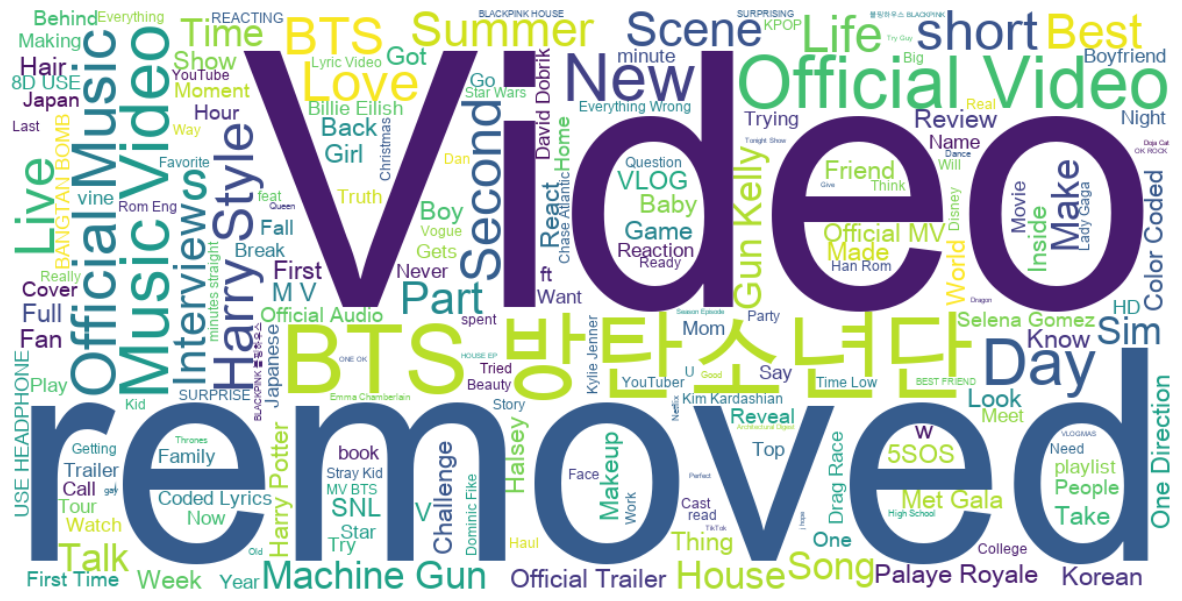

In [12]:
df = df[~(df['title'].str.contains('https'))]

combined_text = ' '.join(df['title'])

wordcloud = WordCloud(width = 1000
                      , height = 500
                      , background_color = 'white'
                      , font_path=font_path
                     ).generate(combined_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# 'Removed' is another word that could mean deleted videos
# Below we are looking at the results of the titles with 'removed'
removed_result = df[df['title'].str.contains('removed', case = False)]
print(removed_result)

        header                                              title  \
526    YouTube  (Karaoke) Dominic Fike - Babydoll / MR,Inst (v...   
690    YouTube                      a video that has been removed   
821    YouTube                      a video that has been removed   
866    YouTube                      a video that has been removed   
1064   YouTube                      a video that has been removed   
...        ...                                                ...   
31558  YouTube                      a video that has been removed   
31590  YouTube                      a video that has been removed   
31600  YouTube                      a video that has been removed   
31640  YouTube                      a video that has been removed   
31668  YouTube                      a video that has been removed   

                                          titleUrl  \
526    https://www.youtube.com/watch?v=IvkKji31cxQ   
690                                            NaN   
821      

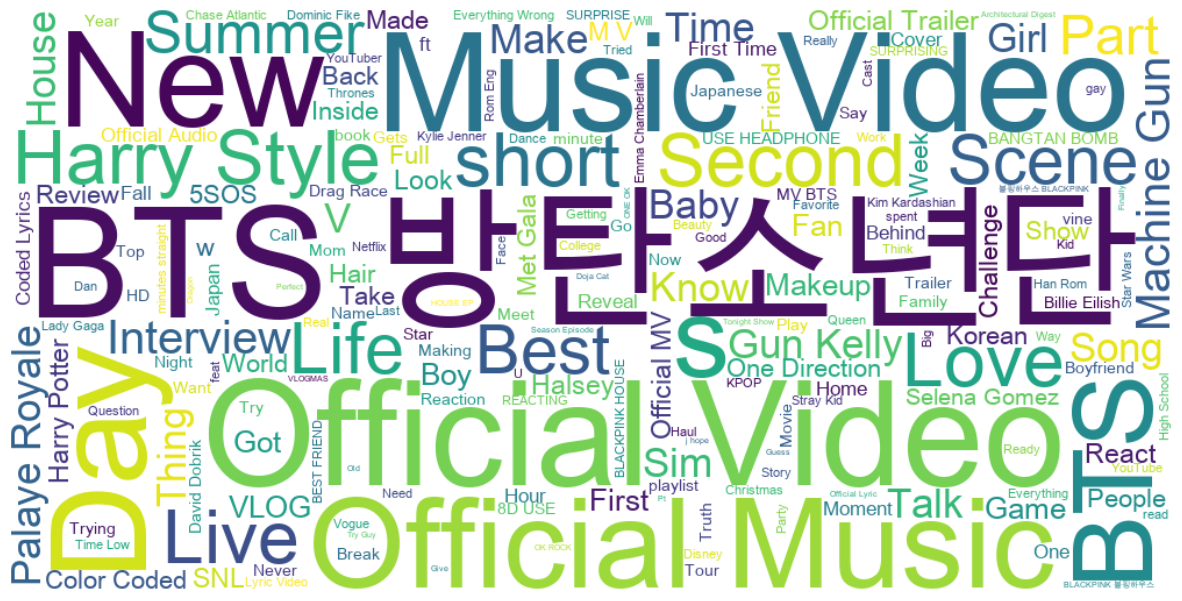

In [14]:
# 'removed' seems to be linked with deleted videos with the name 'a video that has been removed'
# we will be removing titles that contain 'a video that has been removed'
df = df[~(df['title'].str.contains('watch') 
          | df['title'].str.contains('a video that has been removed'))]

combined_text = ' '.join(df['title'])

wordcloud = WordCloud(width = 1000
                      , height = 500
                      , background_color = 'white'
                      , font_path=font_path
                     ).generate(combined_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### This final word cloud shows a visualized look at the main buzz words in the most viewed type of videos from the years 2015 to 2023. Though word cloud can be innacurate, we can get the general idea of what types of videos are the most viewed   

#### From this visualization we can see that the main videos being looked at are from the KPop group 'BTS' and Music Videos

### Most watched videos

In [15]:
# The most repeated title in the title column 
## Calculate the value counts for each title
title_counts = df['title'].value_counts()

## Find the most repeated title
most_repeated_title = title_counts.idxmax()

print(f"The most repeated title is '{most_repeated_title}' with {title_counts[most_repeated_title]} occurrences.")

The most repeated title is 'benny blanco, Halsey & Khalid – Eastside (official video)' with 26 occurrences.


In [16]:
# The top 10 most repeated videos watched
## Get the top 10 most repeated titles 
top_10_titles = title_counts.head(10)

print("Top 10 most repeated titles:")
print(top_10_titles)

Top 10 most repeated titles:
benny blanco, Halsey & Khalid – Eastside (official video)         26
NCT U 엔시티 유 'Baby Don't Stop' MV                                  23
Google Career Certificates: In-demand Jobs                        20
NCT 127 엔시티 127 'Regular (English Ver.)' MV                       20
BTS (방탄소년단) LOVE YOURSELF 承 Her 'Serendipity' Comeback Trailer    19
Shout - University of Oregon                                      19
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV             19
BTS (방탄소년단) 'IDOL' Official MV                                    18
Set Yourself Up for Success | Better Results With Grammarly       17
BTS (방탄소년단) '피 땀 눈물 (Blood Sweat & Tears)' Official MV            17
Name: title, dtype: int64


## Analayzing time spent on YouTube

## Frequency by Year

#### Since we are analyzing frequency of videos watched, we have to re-import the data to get the data we lost when analyzing video titles

In [17]:
# Re-import the data under a new alias
df2 = pd.read_json('watch-history.json')

# Data type of time column is string
df2['time'][0]

# Change time column to datetime format
df2['time'] = pd.to_datetime(df2['time'])

# Update the original DataFrame with the updated removal of 2015 and 2016
df2.drop(df2[(df2['time'].dt.year == 2015) | (df2['time'].dt.year == 2016)].index, inplace=True)

df2['time'].tail(10)

31667   2017-01-01 08:01:14.480000+00:00
31668   2017-01-01 07:48:31.101000+00:00
31669   2017-01-01 07:45:22.619000+00:00
31670   2017-01-01 07:40:53.342000+00:00
31671   2017-01-01 07:36:59.202000+00:00
31672   2017-01-01 07:31:22.335000+00:00
31673   2017-01-01 07:29:29.830000+00:00
31674   2017-01-01 01:33:26.377000+00:00
31675   2017-01-01 01:30:43.132000+00:00
31676   2017-01-01 01:14:59.420000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [18]:
# Data type of time column is string
df2['time'][0]

# Change time column to datetime format
df2['time'] = pd.to_datetime(df2['time'])

In [19]:
# Create value counts by year, month, day of week and hour to visualize
yearly_counts = df2['time'].dt.year.value_counts()
monthly_counts = df2['time'].dt.month.value_counts()
hourly_counts = df2['time'].dt.hour.value_counts()

# Day of week need to map hte name of day 
#Extract the day of the week (Monday = 0, SUnday = 6) from the datetime column
## and create a new column 'day_of_week'
df2['day_of_week'] = df2['time'].dt.dayofweek

# Map the numeric day of the week to the day name
day_names = ['Monday'
            , 'Tuesday'
            , 'Wednesday'
            , 'Thursday'
            , 'Friday'
            , 'Saturday'
            , 'Sunday'
            ]
df2['day_name'] = df2['day_of_week'].map(lambda x: day_names[x])

# Group the data by 'day_name' and calculate the counts for each day of the week
daily_counts = df2['day_name'].value_counts()

daily_counts

Wednesday    4720
Thursday     4713
Friday       4647
Sunday       4544
Tuesday      4390
Saturday     4361
Monday       4302
Name: day_name, dtype: int64

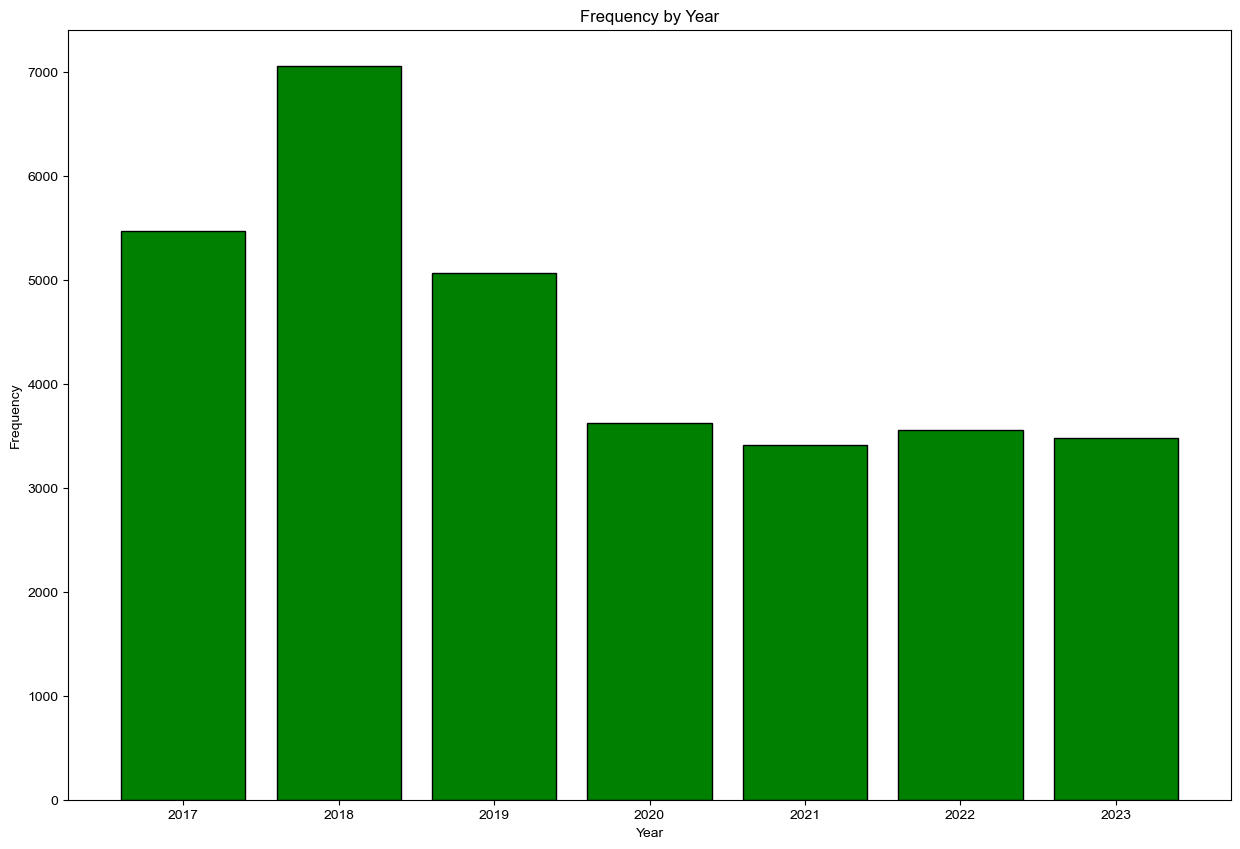

In [20]:
# Histogram by year
plt.figure(figsize = (15, 10))
plt.bar(yearly_counts.index
        , yearly_counts.values
        , color = 'green'
        , edgecolor = 'black'
       )

# Set the x-axis ticks to display only the integer year values 
plt.xticks(yearly_counts.index
           , map(int
                 , yearly_counts.index
                ))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency by Year')

plt.show()

In [21]:
yearly_counts

2018    7056
2017    5474
2019    5067
2020    3627
2022    3562
2023    3478
2021    3413
Name: time, dtype: int64

#### We can see that the year with the most amount of viewed videos is 2018 with 7056 minutes, while the least amount was 2021 at 3413 minutes. The low number can be explained by the date at which I created a YouTube account, which was in August 2015. 

### Frequency by Month

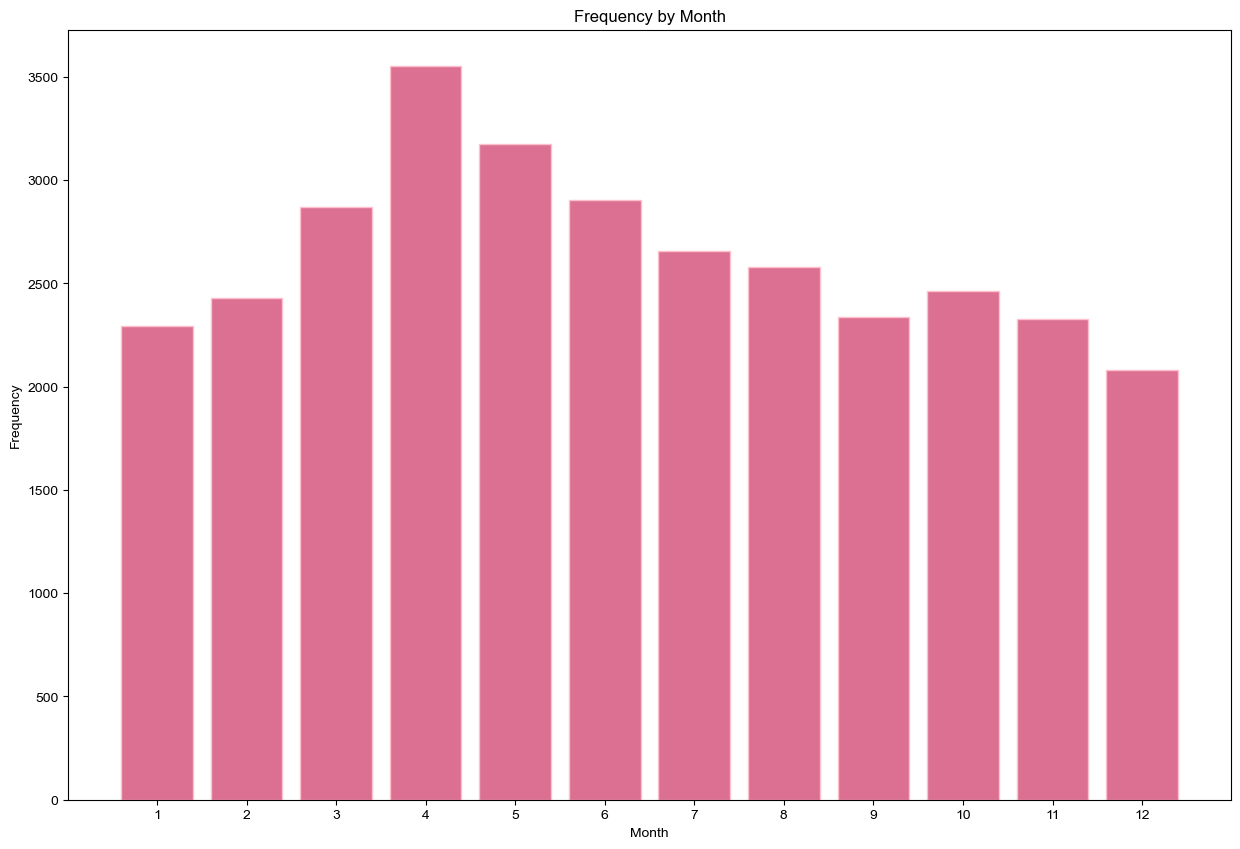

In [22]:
# Create the histogram by month
plt.figure(figsize = (15
                      , 10))
plt.bar(monthly_counts.index
        , monthly_counts.values
        , color = 'palevioletred'
        , edgecolor = 'pink'
       )
# Set the x-axis ticks to display all the integer month values
plt.xticks(monthly_counts.index)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency by Month')
plt.show()

### What the monthly frequency distribution for each year

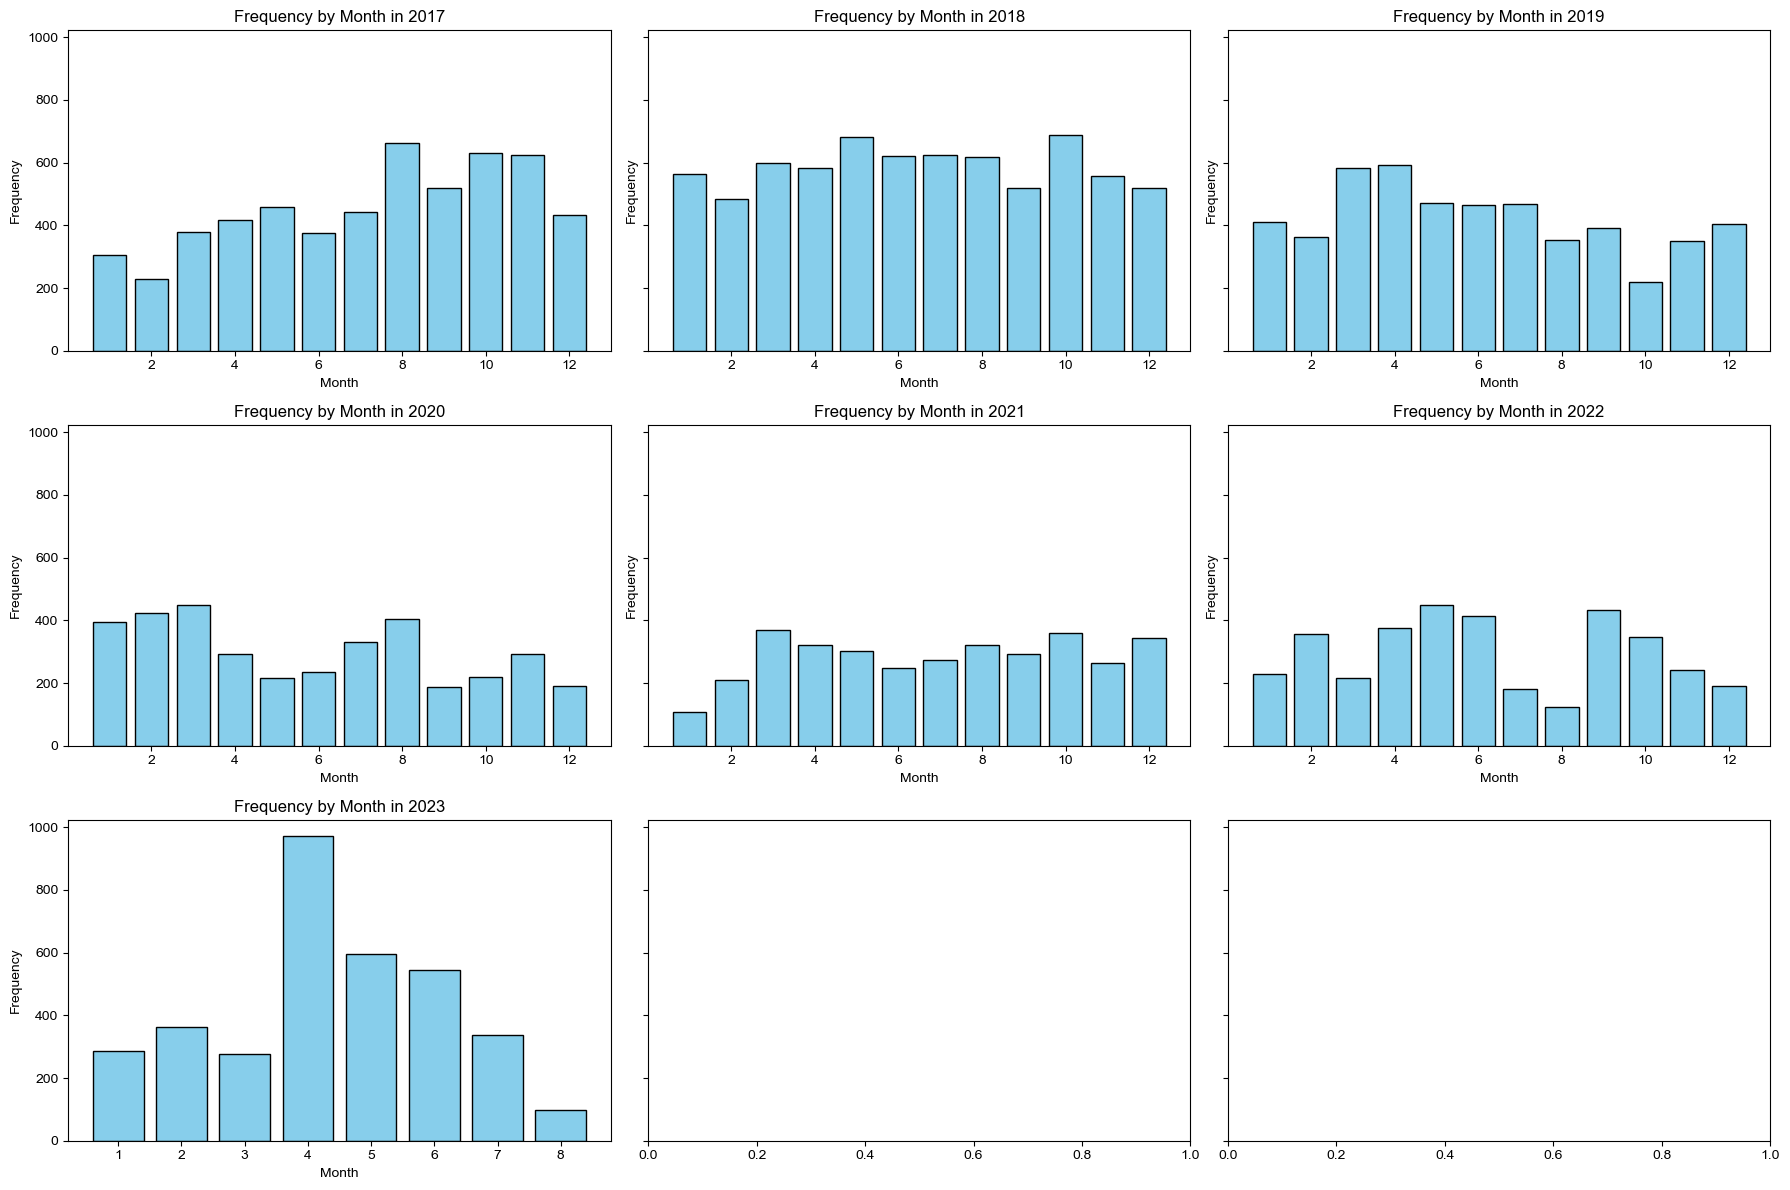

In [23]:
df2['year'] = df2['time'].dt.year
df2['month'] = df2['time'].dt.month

year_monthly_counts = df2.groupby(['year'
                                  , 'month'
                                 ]).size()

# Reset index to move the 'year' and 'month' from index to columns
year_monthly_counts = year_monthly_counts.reset_index(name = 'count')

# Create seven seperate subplots for every year from 2017 to 2023
fig, axs = plt.subplots(3,3,figsize=(18,12), sharey=True)
axs=axs.ravel()

# Folter the data for each year and plot the month frequency
for year, ax in zip(range(2017,2024), axs):
    year_counts = year_monthly_counts[year_monthly_counts['year']==year]
    ax.bar(year_counts['month']
           , year_counts['count']
           , color='skyblue'
           , edgecolor='black'
          )
    ax.set_xlabel('Month')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency by Month in {year}')

plt.tight_layout()
plt.show()

In [24]:
# Average daily videos watched for 2017 through 2023
years = range(2017
              , 2024
             )
averages = []

for year in years:
    avg = df2[df2['time'].dt.year == year].shape[0] / 365
    averages.append({'year':year
                     , 'average': avg})

for item in averages:
    print(f"Year: {item['year']}, Average: {item['average']}")

Year: 2017, Average: 14.997260273972604
Year: 2018, Average: 19.33150684931507
Year: 2019, Average: 13.882191780821918
Year: 2020, Average: 9.936986301369863
Year: 2021, Average: 9.35068493150685
Year: 2022, Average: 9.758904109589041
Year: 2023, Average: 9.528767123287672


#### From looking at these frequency distributions, it shows how in the years 2017-2019, I watched YouTube videos more than the other years. This could be attributed to 2017-2019 being the years I was in high school, where I had more free time than when I was in university. 

## Frequency by Day of Week 

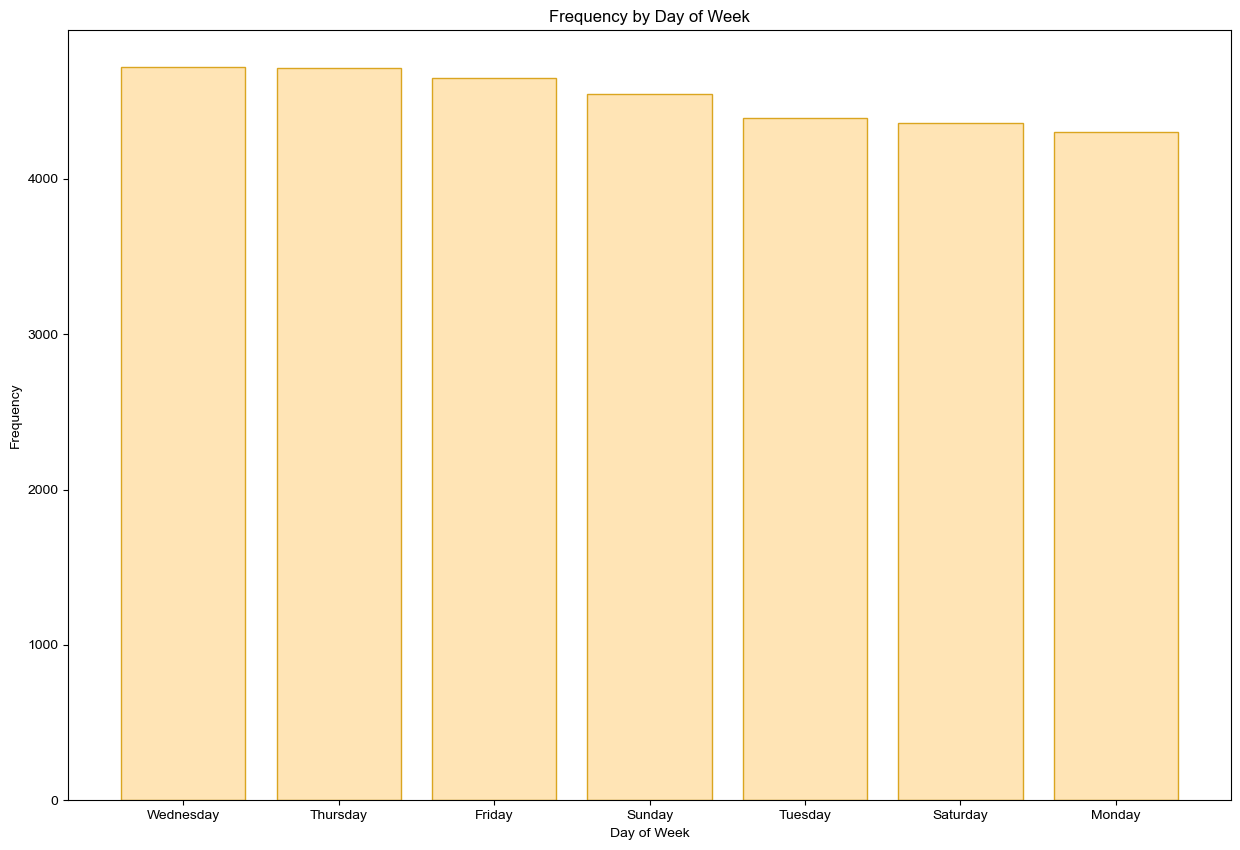

In [25]:
# Create the histogrm by day of week using matplotlib
plt.figure(figsize = (15
                      , 10
                     ))
plt.bar(daily_counts.index
        , daily_counts.values
        , color = 'moccasin'
        , edgecolor = 'goldenrod'
       )
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency by Day of Week')

plt.show()

#### I do not see much significant differences in the day of the week. The most watched days being:
##### 1. Wednesday 
##### 2. Friday
##### 3. Thursday

## Frequency by Hour

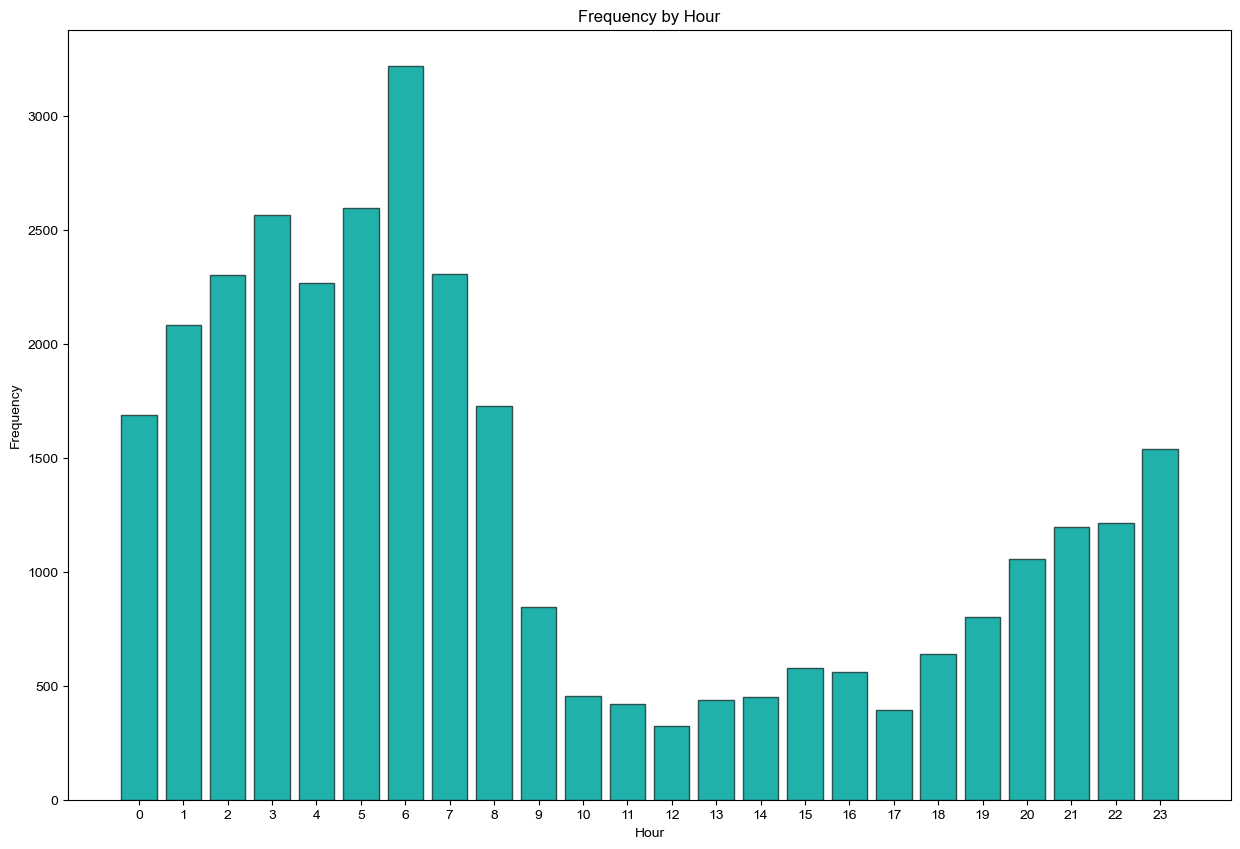

In [26]:
# Create the histogram by mouth using matplotlib
plt.figure(figsize = (15
                      , 10
                     ))
plt.bar(hourly_counts.index
        , hourly_counts.values
        , color = 'lightseagreen'
        , edgecolor = 'darkslategrey'
       )

# Set the x-axis ticks to display all the integer hour values
plt.xticks(hourly_counts.index)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by Hour')
plt.show()

### What the hour frequency distribution for each year

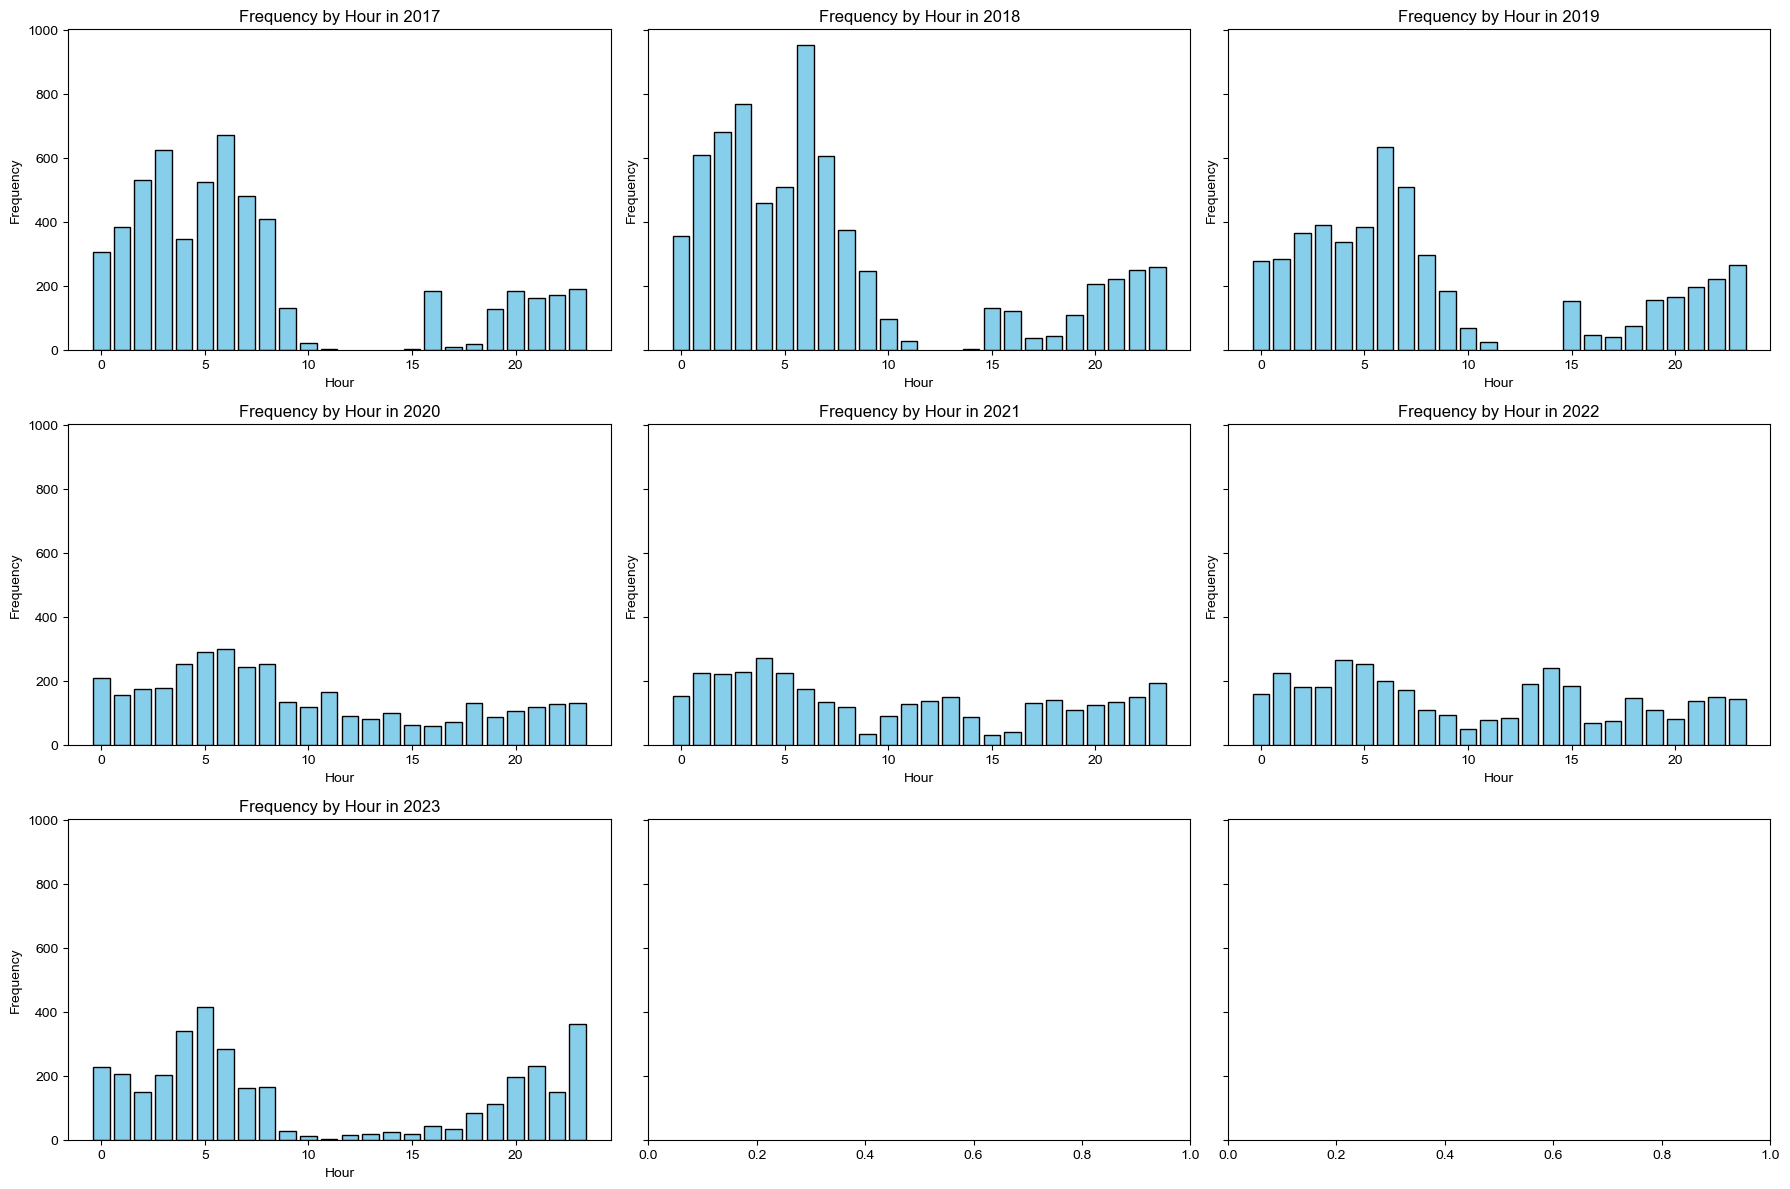

In [27]:
df2['year'] = df2['time'].dt.year
df2['hour'] = df2['time'].dt.hour

year_hour_counts = df2.groupby(['year'
                                  , 'hour'
                                 ]).size()

# Reset index to move the 'year' and 'month' from index to columns
year_hour_counts = year_hour_counts.reset_index(name = 'count')

# Create seven seperate subplots for every year from 2017 to 2023
fig, axs = plt.subplots(3,3,figsize=(18,12), sharey=True)
axs=axs.ravel()

# Folter the data for each year and plot the month frequency
for year, ax in zip(range(2017,2024), axs):
    year_counts = year_hour_counts[year_hour_counts['year']==year]
    ax.bar(year_counts['hour']
           , year_counts['count']
           , color='skyblue'
           , edgecolor='black'
          )
    ax.set_xlabel('Hour')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency by Hour in {year}')

plt.tight_layout()
plt.show()

#### Looking by year and by taking timezone into account, the most frequent times I watched videos from 2017 to 2019 were 5am to 2pm HST. While in the years 2020 to 2022 were 8am to 4pm PST. In 2023, was from 12am to 8am JST. Relatively speaking, there is a significance of 12am to 8am for the most frequently watched videos. 

#### Conclusion: Based on the videos I watched, most revolve around music with 'BTS', 'Official Video', 'Official Music', and 'Music Video' are my most watched. My most watched was 'Eastside' Benny Blanco, Halsey and Khalid music video with 26 watches. This suggests that I am less likely to re-watch a non-music video compared to a music video. In the past, I watched more videos in high school than in university, watching more videos around summer break. There were no notable significance in the days I watch videos. Regarding hours, I watch more videos in the morning than during the day and in the evening. It is worth noting that the time is in JST, thus converting the time to PST would be around 8am to 4pm. 

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31677 entries, 0 to 31676
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            31677 non-null  object             
 1   title             31677 non-null  object             
 2   titleUrl          30858 non-null  object             
 3   subtitles         25029 non-null  object             
 4   time              31677 non-null  datetime64[ns, UTC]
 5   products          31677 non-null  object             
 6   activityControls  31677 non-null  object             
 7   description       3019 non-null   object             
 8   details           3159 non-null   object             
 9   day_of_week       31677 non-null  int64              
 10  day_name          31677 non-null  object             
 11  year              31677 non-null  int64              
 12  month             31677 non-null  int64              
 13  h